<a href="https://colab.research.google.com/github/bereznik/Anime-Recommendations/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
from matplotlib import pyplot as plt
plt.rcParams['axes.facecolor'] = 'white'
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
plt.style.use('default')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Given someone liked some Animes, what would be other Animes that this person might like?

In [5]:
anime_original = pd.read_csv('/content/drive/My Drive/Anime analysis/anime.csv')
rating_original = pd.read_csv('/content/drive/My Drive/Anime analysis/rating.csv')

In [6]:
np.unique(rating_original.anime_id.values).shape

(11200,)

In [7]:
rating_original.shape

(7813737, 3)

In [8]:
anime_original.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
rating_original.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


# EDA - Exploratory Data Analysis

In [10]:
anime = anime_original.copy()
rating = rating_original.copy()

In [11]:
print(anime.shape)
print(rating.shape)

(12294, 7)
(7813737, 3)


In [12]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [13]:
anime.name.value_counts().sum() == anime.shape[0] # -> All the anime at the list are unique!

True

## 1 - Genre

## Let's analyze the genre column

### An important fact to mention is that a single anime could be classified with more than 1 genre

In [14]:
list_genres = []

for i in range(0,2):
    list_genres.append(anime.genre[i])
print(list_genres)    

# Each anime has multiple genres but they are written as a string, so let's make them a list
    

['Drama, Romance, School, Supernatural', 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen']


In [15]:
anime.genre = anime.genre.str.split(', ')
anime.genre

# Now they are lists! 

0                   [Drama, Romance, School, Supernatural]
1        [Action, Adventure, Drama, Fantasy, Magic, Mil...
2        [Action, Comedy, Historical, Parody, Samurai, ...
3                                       [Sci-Fi, Thriller]
4        [Action, Comedy, Historical, Parody, Samurai, ...
                               ...                        
12289                                             [Hentai]
12290                                             [Hentai]
12291                                             [Hentai]
12292                                             [Hentai]
12293                                             [Hentai]
Name: genre, Length: 12294, dtype: object

### Let's make the analysis of the most common genres

In [16]:
anime.genre.isnull().value_counts()

False    12232
True        62
Name: genre, dtype: int64

## CreatIing lists with the genre unique values and the quantity in which they appear

In [17]:
list_genres = []

for j in range(0, len(anime)):
    if anime.genre[j] is not np.nan:
        n_genre = len(anime.genre[j])
        for i in range(0,n_genre):
            list_genres.append(anime.genre[j][i])
   

In [18]:
list_genres_array = np.array(list_genres)
(unique_list_genres, count_genres) = np.unique(list_genres_array,return_counts = True)

## Plot the genre and how many animes are of this genre

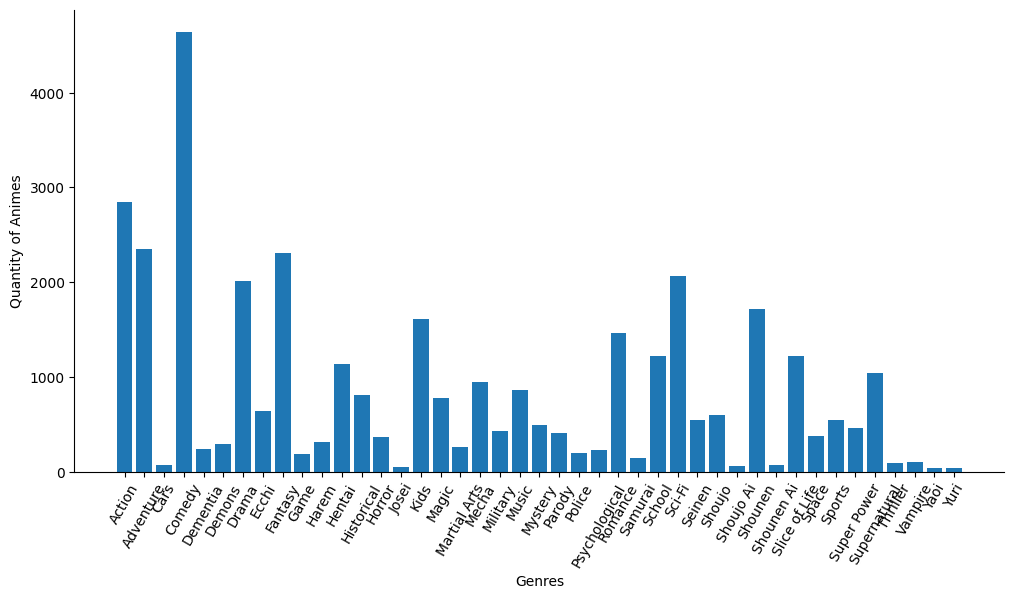

In [19]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot()
ax.bar(unique_list_genres,count_genres)
ax.set_xlabel('Genres')
ax.set_ylabel('Quantity of Animes')
#ax.set_title('Quantity of Animes')
for tick in ax.get_xticklabels():
    tick.set_rotation(60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### The vast majority of animes produced are of the following genres:
* Comedy
* Action
* Adventure
* Drama
* Fantasy
* Psychological
* Sci-fi
* Kids
* Shounen

Although comedy is much higher, we should note that most anime use comedy consistently throught the story to make it more enjoyable, even though it's not the main focus of the story. This is clearly seen analyzing One Piece.

In [20]:
for genre in anime.loc[anime.name == 'One Piece','genre']:
    print(genre)

['Action', 'Adventure', 'Comedy', 'Drama', 'Fantasy', 'Shounen', 'Super Power']


# 2 - Type

## Refers to the type of the anime shown. A few remarks on that:

* OVA: Non Canon Story
* ONA: Anime directly released in the Internet

## Let's make the analysis of the Type column

In [21]:
anime.type.value_counts()

TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: type, dtype: int64

### Plotting this results

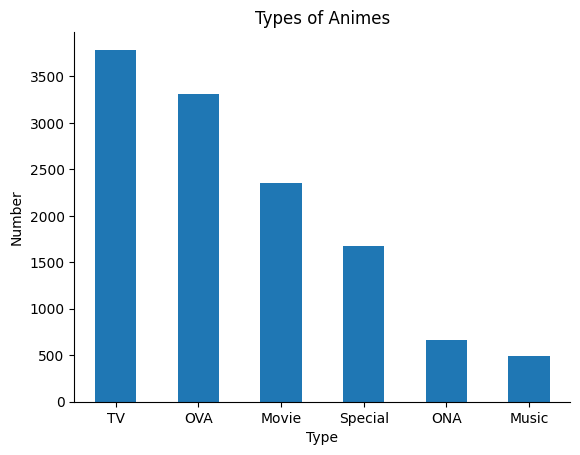

In [22]:
fig = plt.figure()
ax = anime.type.value_counts().plot.bar()
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
ax.set_xlabel('Type')
ax.set_ylabel('Number')
ax.set_title('Types of Animes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### Here we see that the majority of animes are TV shows, as expected. A curious fact is that there are a lot of OVA's too!

# 3 - Episodes

## Describe the number of episodes (if film = 1)

### OBS: Anime series that are still airing have a NaN value of #episodes

### Note that the episodes column is actually a string for each occurence. Let's fix that!

In [23]:
anime.episodes = pd.to_numeric(anime.episodes, errors='coerce')

In [24]:
anime.episodes.value_counts( ) # Now they are actual numbers!

1.0       5677
2.0       1076
12.0       816
13.0       572
26.0       514
          ... 
120.0        1
124.0        1
137.0        1
243.0        1
1306.0       1
Name: episodes, Length: 186, dtype: int64

### It doesn't make a lot of sense to graph them seperately because we have a lot of different values. So, let's make some bins!

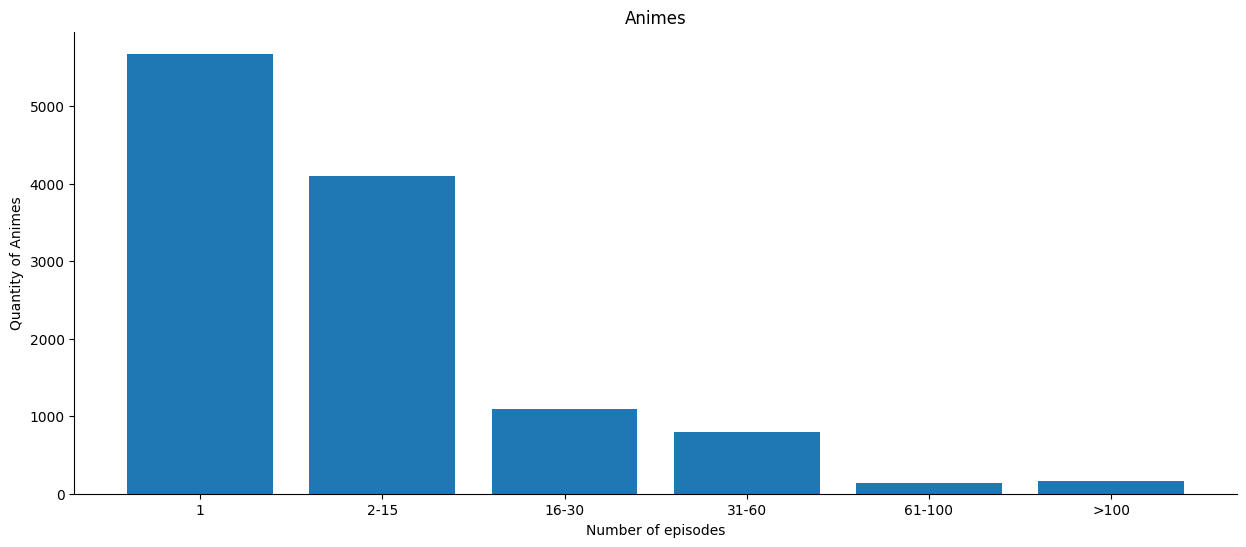

In [33]:
b1 = [1]
b2 = [2,15]
b3 = [16,30]
b4 = [31,60]
b5 = [61,100]
bins = [b1,b2,b3,b4,b5]
list_bins = []
for i in range(1,5):
    n = len(anime.loc[(anime.episodes <= bins[i][1]) & (anime.episodes >= bins[i][0])])
    list_bins.append(n)

#let's get the first (=1) and the last (>100) 

list_bins.insert(0,len(anime.loc[anime.episodes == 1]))
    
list_bins.append(len(anime.loc[anime.episodes > 100]))
    
#print(list_bins)
#print(bins)

X = ['1', '2-15', '16-30', '31-60', '61-100', '>100']

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
ax.bar(X,list_bins)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Quantity of Animes')
ax.set_title('Animes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## That's not really fair because all the movies have 1 episode so there is a lot of bias towards the 1 episode Animes. Let's try to plot again only including the TV shows category!

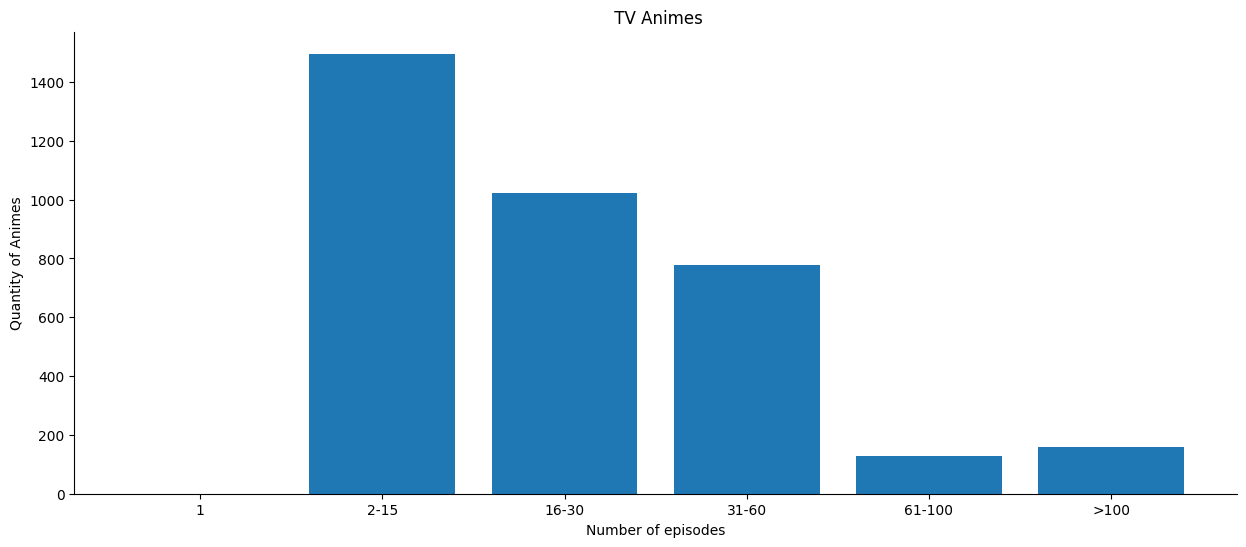

In [34]:
b1 = [1]
b2 = [2,15]
b3 = [16,30]
b4 = [31,60]
b5 = [61,100]
bins = [b1,b2,b3,b4,b5]
list_bins = []
for i in range(1,5):
    n = len(anime.loc[(anime.episodes <= bins[i][1]) & (anime.episodes >= bins[i][0]) & (anime.type == 'TV')])
    list_bins.append(n)

#let's get the first (=1) and the last (>100) 

list_bins.insert(0,len(anime.loc[(anime.episodes == 1) & (anime.type == 'TV' )]))
    
list_bins.append(len(anime.loc[(anime.episodes > 100) & (anime.type == 'TV')]))
    
#print(list_bins)
#print(bins)

X = ['1', '2-15', '16-30', '31-60', '61-100', '>100']

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
ax.bar(X,list_bins)
ax.set_xlabel('Number of episodes')
ax.set_ylabel('Quantity of Animes')
ax.set_title(' TV Animes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### We see that most anime TV shows have less than 15 episodes. We could say that the vast majority of anime shows have 1 season. Note that there are 0 anime TV shows with 1 episode! Another thing to point out is that the ongoing shows have nan episodes, so all the shows like One Piece aren't counted in the >100 episodes TV Shows

# 4 - Rating

In [27]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic, Mil...",TV,64.0,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samurai, ...",TV,51.0,9.16,151266


## Simlarly to the number of episodes, it would be a good idea to bin the ratings together from 1 to 10

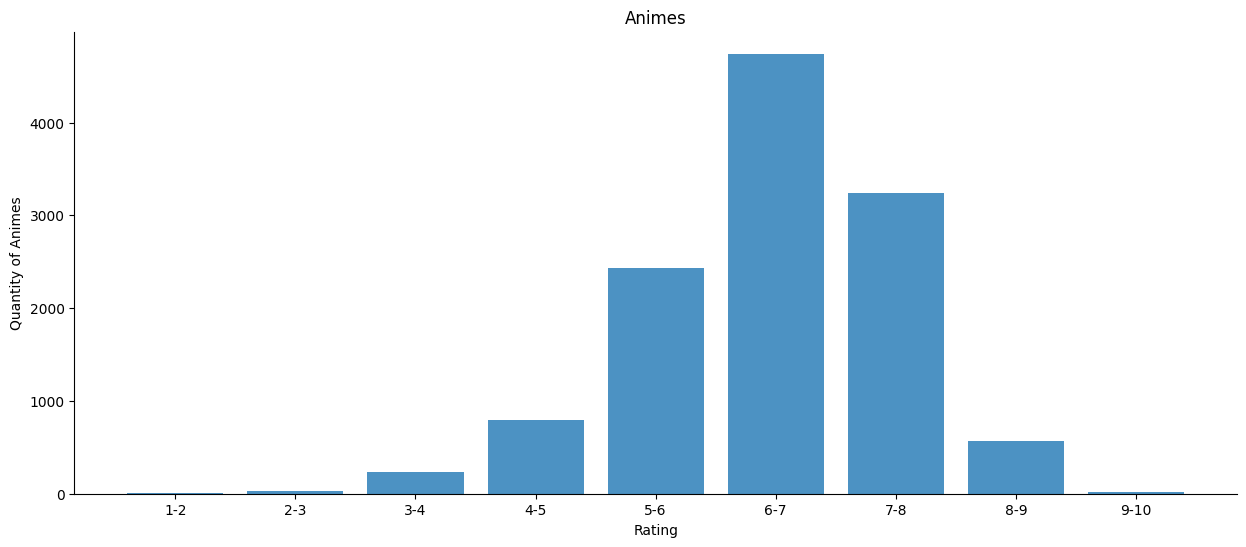

In [35]:
# Creat the bins:
bins = []
for i in range(1,10):
    list1 = list([i,i+1])
    bins.append(list1)
     
list_bins = []
for i in range(0,9):
    n = len(anime.loc[(anime.rating <= bins[i][1]) & (anime.rating > bins[i][0])])
    list_bins.append(n)

    
#print(list_bins)
#print(bins)

X = ['1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']

fig = plt.figure(figsize = (15,6))
ax = fig.add_subplot()
ax.bar(X,list_bins,alpha = 0.8)
ax.set_xlabel('Rating')
ax.set_ylabel('Quantity of Animes')
ax.set_title('Animes')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Here, we should have expected the distribution to be normal, so a few things could be happening, such as:
* Most animes are just good
* The audience isn't picky (people tend to give higher notes to not so good anime)

I would guess the later, since I'm one of those persons hehe